In [1]:
from NeuralNetwork import *
    # ANN, split_dataset
from Perceptron import Perceptron
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# innitialize the dataset for each gate

X_gate = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_gate = np.array([0, 0, 0, 1])
y_or_gate = np.array([0, 1, 1, 1])
y_xor_gate = np.array([0, 1, 1, 0])

In [3]:
# set up the perceptron

n_epochs = 10
learning_rate = 0.1

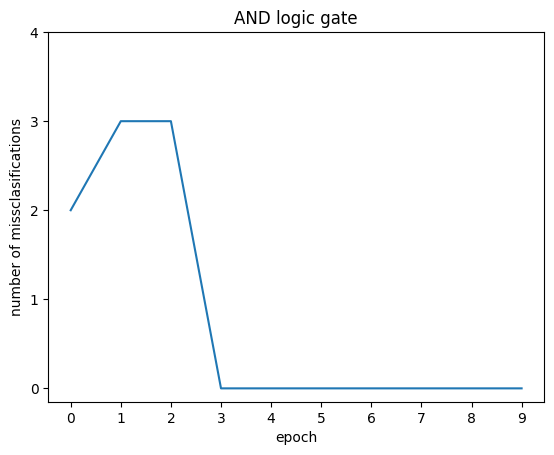

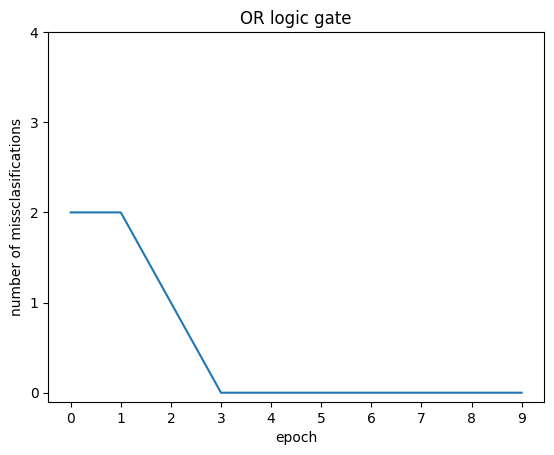

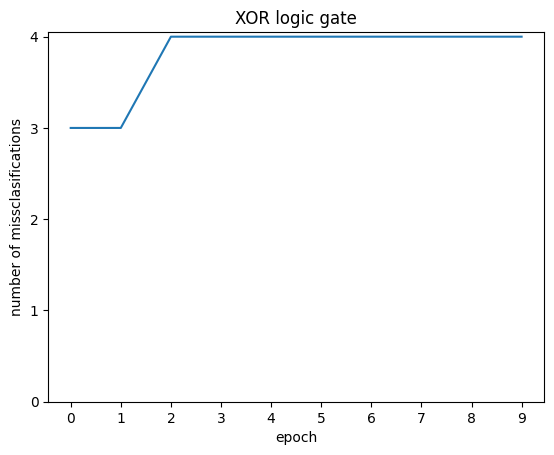

In [4]:
# THIS piece of code shows the error per epoch of the perceptron for each gate

for y_gate, title in zip([y_and_gate, y_or_gate, y_xor_gate], ["AND logic gate", "OR logic gate", "XOR logic gate"]):
    perceptron = Perceptron(learning_rate, n_epochs)
    gate_error = perceptron.train(X_gate, y_gate)
    plt.plot(gate_error)
    plt.xticks(np.arange(0, n_epochs, 1.0))
    plt.yticks(np.arange(0, 5, 1.0))
    plt.ylabel('number of missclasifications')
    plt.xlabel('epoch')
    plt.title(title)
    plt.show()

In [5]:
#load the data into numpy arrays
def vectorize_target(y, num_classes):
    """
    Local function to vectorize a specific target
    :param y: target to vectorize
    :return: vectorized target
    """
    v_y = np.zeros((num_classes, 1))
    v_y[y - 1] = 1.0
    return v_y

with open("../data/features.txt") as file:
    features = [np.array(list(map(float, line.strip('/n').split(',')))).reshape((10, 1))
                    for line in file]

with open("../data/targets.txt") as file:
    targets = [vectorize_target(int(line.rstrip('\n')), 7) for line in file]




In [6]:
# split the data into train, test data 
train_data, test_data = split_dataset(features, targets, 0.2)
# train_data, validation_data = split_dataset(train_data[0], train_data[1], 0.2)

In [7]:
# # Create the network with one hidden layer
#     network = Network([10, 30, 7])
#     # set to the data to which we are learning to 'data' because we are testing
#     # it on the unknown dataset and start training
#     network.train(training_data, 35, 20, 0.07, validation_data)

#     accuracy = network.evaluate(test_data)
#     print(f"accuracy= {accuracy}")


In [8]:
# initialize the network with 10 features, 30 neurons in the hidden layer, 7 neurons in the output layer, learning rate of 0.15, squared loss function, batch size of 64
ann = ANN([30, 7], lr = 0.15, loss_function="square", number_of_features = 10, batch_size=64)



In [9]:
# fit the network to the data with 35 epochs
# baches of 20, learning rate of 0.07
ann.fit(train_data, 10)


Epoch  1  done.
Epoch  2  done.
Epoch  3  done.
Epoch  4  done.
Epoch  5  done.
Epoch  6  done.
Epoch  7  done.
Epoch  8  done.
Epoch  9  done.
Epoch  10  done.


In [10]:
def accuracy(dataset, network):
    all = len(dataset)
    corr = 0
    for x, y in dataset:
        output = network.forward_propagate(x)
        corr = corr + 1 if np.argmax(output) == np.argmax(y) else corr
    accuracy = corr / all
    return accuracy

In [11]:
# evaluate the accuracy of the network on the test data

acc = accuracy(test_data, ann)

print(f"accuracy= {acc}")


accuracy= 0.8980891719745223


In [12]:
# num_of_batches = 32

# batches = create_mini_batches(x_train, y_train, num_of_batches)
# print(batches)
# print("Created: ", len(batches), " batches")
# print(len(x_train) / num_of_batches)
# for batch in batches:
#     if(len(list(batch)) == 0):
#         print("Stachu nakurwia")

Epoch  1  done.
Epoch  2  done.
Epoch  3  done.
Epoch  4  done.
Epoch  5  done.
Epoch  6  done.
Epoch  7  done.
Epoch  8  done.
Epoch  9  done.
Epoch  10  done.
Epoch  1  done.
Epoch  2  done.
Epoch  3  done.
Epoch  4  done.
Epoch  5  done.
Epoch  6  done.
Epoch  7  done.
Epoch  8  done.
Epoch  9  done.
Epoch  10  done.
Epoch  1  done.
Epoch  2  done.
Epoch  3  done.
Epoch  4  done.
Epoch  5  done.
Epoch  6  done.
Epoch  7  done.
Epoch  8  done.
Epoch  9  done.
Epoch  10  done.
Epoch  1  done.
Epoch  2  done.
Epoch  3  done.
Epoch  4  done.
Epoch  5  done.
Epoch  6  done.
Epoch  7  done.
Epoch  8  done.
Epoch  9  done.
Epoch  10  done.
Epoch  1  done.
Epoch  2  done.
Epoch  3  done.
Epoch  4  done.
Epoch  5  done.
Epoch  6  done.
Epoch  7  done.
Epoch  8  done.
Epoch  9  done.
Epoch  10  done.
Epoch  1  done.
Epoch  2  done.
Epoch  3  done.
Epoch  4  done.
Epoch  5  done.
Epoch  6  done.
Epoch  7  done.
Epoch  8  done.
Epoch  9  done.
Epoch  10  done.
Epoch  1  done.
Epoch  2  done.
Ep

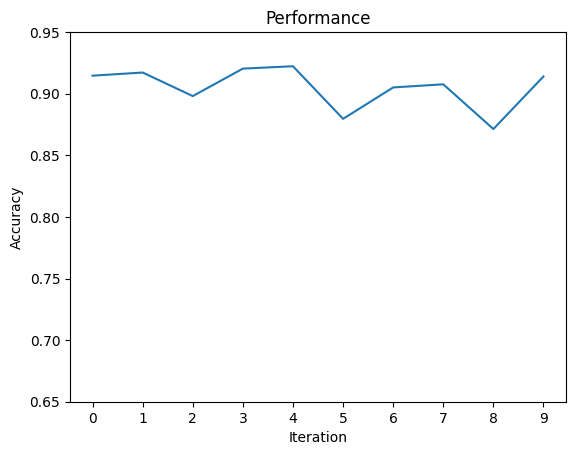

In [17]:
# Question 1.3.10
# Train your network 10 times, each with different initial weights. How does the initialization impact the performance? Plot your results.
accuracies = []
for i in range(10):
   ann = ANN([30, 7], lr = 0.15, loss_function="square", number_of_features = 10, batch_size=64)
   ann.fit(train_data, 10)
   accuracies.append(accuracy(test_data, ann))
print(accuracies)
plt.plot(accuracies)
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.title("Performance")
plt.xticks(np.arange(0, 10, 1))
plt.yticks(np.arange(0.65, 1.0, 0.05))
plt.show()